<a href="https://colab.research.google.com/github/LauraCarolinaJaramilloBuitrago/Tarea_4_Algoritmos_Aprendizaje_no_supervisado/blob/main/Tarea_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PASO 1: Análisis exploratorio de los datos


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

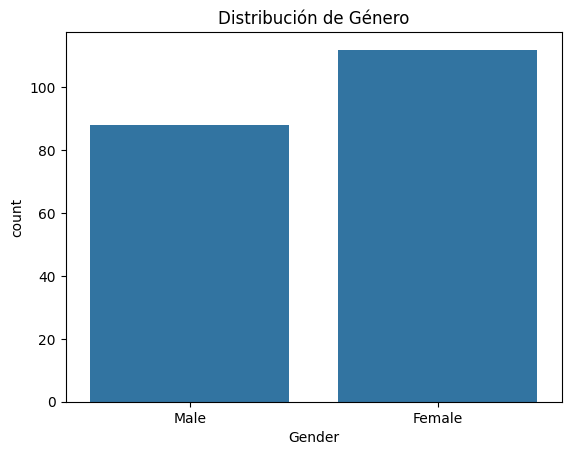

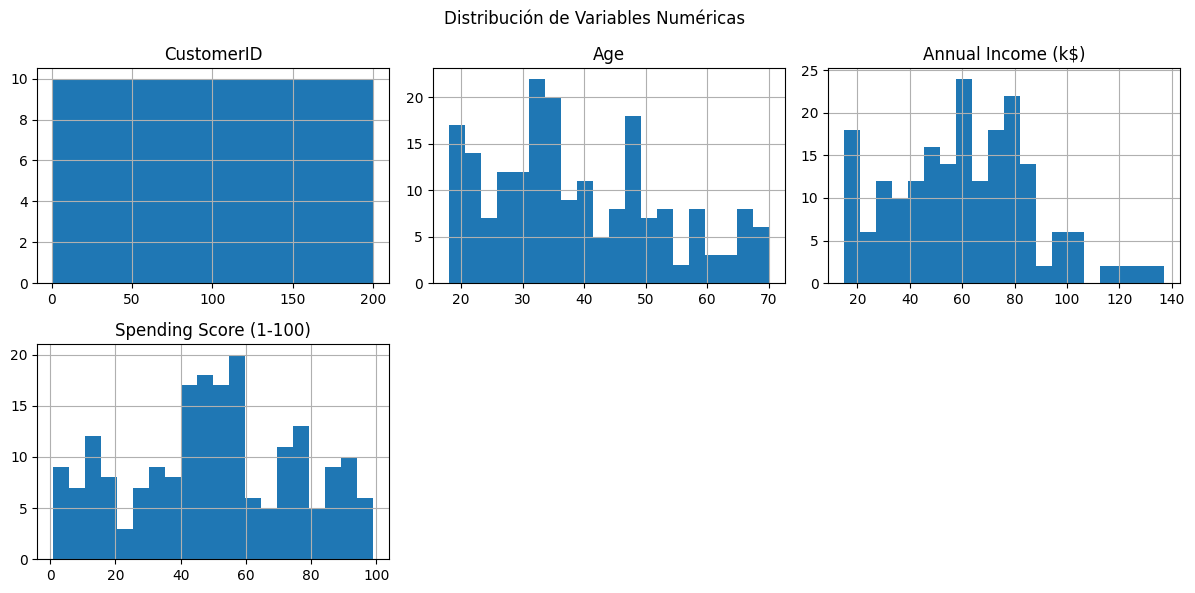

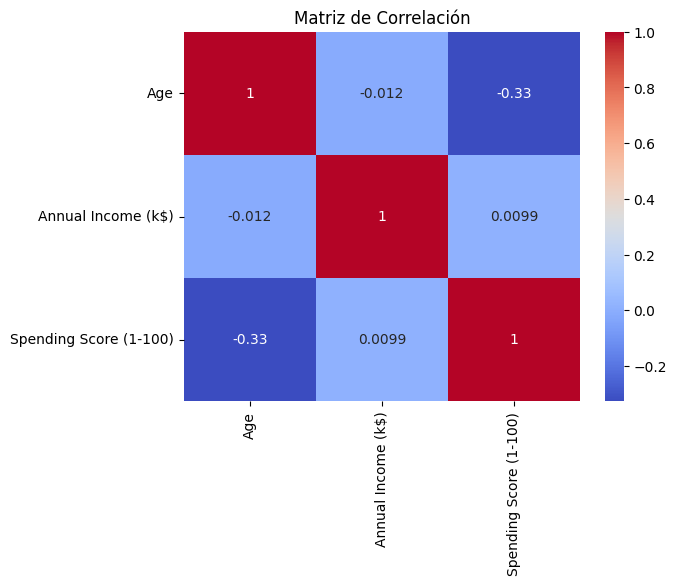

In [2]:
# 1.1 Cargar y visualizar los datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Mall_Customers.csv')
print(df.head())  # muestra las primeras filas

# 1.2 Estadísticas descriptivas
print(df.describe())

# 1.3 Distribución por género
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.show()

# 1.4 Histogramas de variables numéricas
df.hist(bins=20, figsize=(12, 6), layout=(2, 3))
plt.suptitle('Distribución de Variables Numéricas')
plt.tight_layout()
plt.show()

# 1.5 Matriz de correlación
sns.heatmap(df.drop(columns='CustomerID').select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


##  PASO 2: Preprocesar los datos (limpieza, transformación)

In [3]:
# 2.1 Eliminar columna que no aporta al análisis (CustomerID)
df = df.drop(columns='CustomerID')

# 2.2 Codificar 'Gender' de texto a número: Male=1, Female=0
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# 2.3 Escalar los datos para que todas las variables estén en la misma escala
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 2.4 Convertir el resultado a DataFrame para uso posterior
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
print(df_scaled.head())


     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


##  PASO 3: Seleccionar características relevantes

In [5]:
# 3.1 Seleccionamos todas las columnas (ya normalizadas) porque todas aportan al análisis:
# ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
features = df_scaled.copy()


## PASO 4: Entrenar el modelo K-means

In [6]:
from sklearn.cluster import KMeans

# 4.1 Elegimos el número de clusters (por ejemplo 5)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# 4.2 Agregar las etiquetas al DataFrame original
df_scaled['Cluster_KMeans'] = kmeans.labels_


##  PASO 5: Evaluar el modelo con métricas

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# 5.1 Métrica Silhouette (entre -1 y 1, más alto es mejor)
silhouette = silhouette_score(features, kmeans.labels_)

# 5.2 Índice Calinski-Harabasz (más alto es mejor)
calinski = calinski_harabasz_score(features, kmeans.labels_)

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")


Coeficiente de Silhouette: 0.272
Índice de Calinski-Harabasz: 62.13


## PASO 6: Visualizar resultados

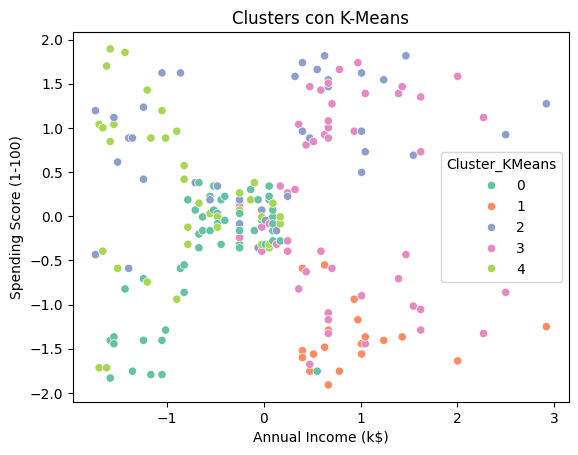

In [11]:
# 6.1 Visualizar clusters con dos variables principales
sns.scatterplot(data=df_scaled, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster_KMeans', palette='Set2')
plt.title('Clusters con K-Means')
plt.show()


## PASO 7: Interpretar resultados

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.509804  56.470588           46.098039   
1        159.500000  1.000000  39.500000           85.150000   
2        100.809524  1.000000  28.690476           60.904762   
3        151.510204  0.000000  37.897959           82.122449   
4         50.526316  0.000000  27.315789           38.842105   

         Spending Score (1-100)  
Cluster                          
0                     39.313725  
1                     14.050000  
2                     70.238095  
3                     54.448980  
4                     56.210526  


<ipython-input-15-0a36c7706efd>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_summary, x='Cluster', y=column, palette='Set2')
<ipython-input-15-0a36c7706efd>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_summary, x='Cluster', y=column, palette='Set2')
<ipython-input-15-0a36c7706efd>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_summary, x='Cluster', y=column, palette='Set2')
<ipython-input-15-0a36c7706efd>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be rem

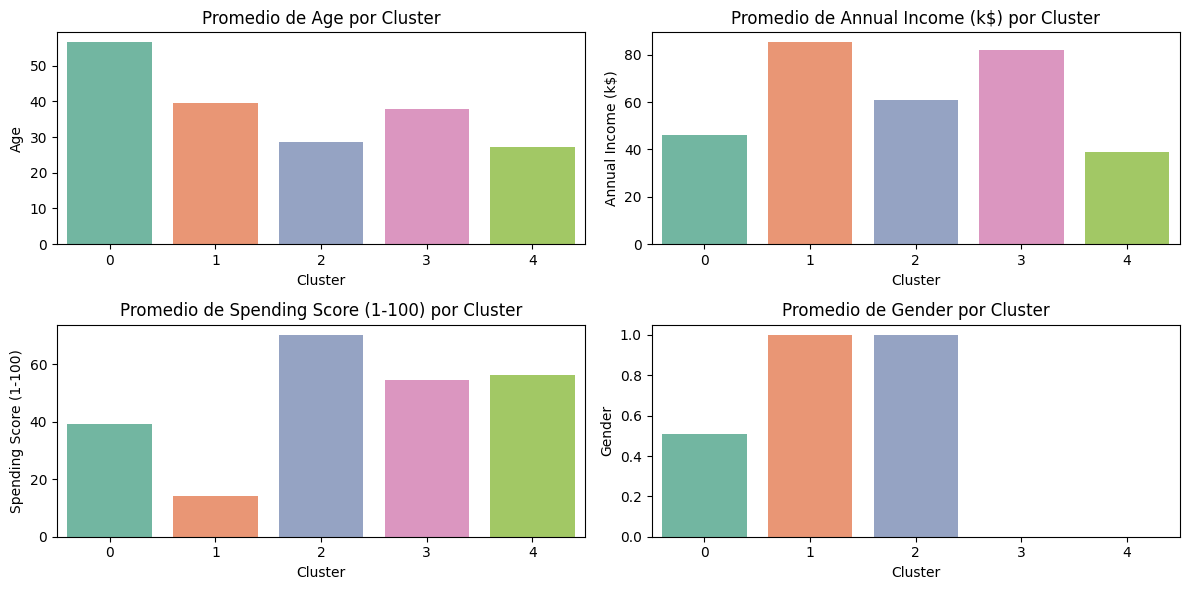

In [15]:
# Leer nuevamente el dataset original
df_original = pd.read_csv('Mall_Customers.csv')

# Agregar la etiqueta del cluster
df_original['Cluster'] = kmeans.labels_

# Convertir 'Gender' a numérico para poder promediarla (opcional)
df_original['Gender'] = df_original['Gender'].map({'Male': 1, 'Female': 0})

# Agrupar por cluster y obtener estadísticas solo de columnas numéricas
group_summary = df_original.groupby('Cluster').mean(numeric_only=True)

# Mostrar los perfiles promedio por cluster
print(group_summary)



# Volver a entrenar el modelo KMeans en caso de que se haya perdido la variable
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Repreparar los datos
df = pd.read_csv('Mall_Customers.csv')
df = df.drop(columns='CustomerID')
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
features = StandardScaler().fit_transform(df)

# Entrenar el modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Volver a preparar el DataFrame original con clusters y convertir 'Gender'
df_original = pd.read_csv('Mall_Customers.csv')
df_original['Gender'] = df_original['Gender'].map({'Male': 1, 'Female': 0})
df_original['Cluster'] = kmeans.labels_

# Agrupar para obtener promedio por cluster
group_summary = df_original.groupby('Cluster').mean(numeric_only=True).reset_index()

# Graficar características por cluster
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']):
    plt.subplot(2, 2, i+1)
    sns.barplot(data=group_summary, x='Cluster', y=column, palette='Set2')
    plt.title(f'Promedio de {column} por Cluster')
    plt.tight_layout()

plt.show()
